# Import libraries

In [80]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

import datetime

# read all 12 csv files into a dataframe

In [11]:
# ## keith's method
# # import os library

# # store the csv files in a list. the csvs's directory path as the parameter for .listdir()
# import os           
# files = [file for file in os.listdir('sales data')]         

# # create an empty dataframe to store the csvs later
# df =pd.DataFrame()

# # iterate over each file in files and concatenate with df above
# for file in files:
#     # read the file as a dataframe
#     month = pd.read_csv(f'sales data\{file}')

#     # concatenate with the empty dataframe, df
#     df = pd.concat([df, month], axis = 0)

# df

df1 = pd.read_csv(r'sales data\Sales_January_2019.csv')
df2 = pd.read_csv(r'sales data\Sales_February_2019.csv')
df3 = pd.read_csv(r'sales data\Sales_March_2019.csv')
df4 = pd.read_csv(r'sales data\Sales_April_2019.csv')
df5 = pd.read_csv(r'sales data\Sales_May_2019.csv')
df6 = pd.read_csv(r'sales data\Sales_June_2019.csv')
df7 = pd.read_csv(r'sales data\Sales_July_2019.csv')
df8 = pd.read_csv(r'sales data\Sales_August_2019.csv')
df9 = pd.read_csv(r'sales data\Sales_September_2019.csv')
df10 = pd.read_csv(r'sales data\Sales_October_2019.csv')
df11 = pd.read_csv(r'sales data\Sales_November_2019.csv')
df12 = pd.read_csv(r'sales data\Sales_December_2019.csv')

df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [13]:
df1.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


# combine all dataframe

In [14]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 0)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# What's the best month for sales? How much was earned that month?

In [15]:
# rename columns
df.columns = ['id', 'product', 'quantity', 'price', 'date', 'address']
df

,id,product,quantity,price,date,address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [16]:
# remove null rows
df = df.dropna(axis = 0, how = 'any')
df.isnull().sum()

id          0
product     0
quantity    0
price       0
date        0
address     0
dtype: int64

In [17]:
# get rid of 'Price Each' and 'Quantity Ordered' values in price and quantity column respectively
df = df.loc[(df['price'] != 'Price Each') | (df['quantity'] != 'Quantity Ordered')]
df

,id,product,quantity,price,date,address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [18]:
# convert values in quantity column to int8
df['quantity'] = pd.to_numeric(df['quantity'], errors = 'coerce').astype(np.int8)

# convert price column to float
df['price'] = pd.to_numeric(df['price'], errors = 'coerce').astype(np.float64)

df

,id,product,quantity,price,date,address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [20]:
# create 'sales' colum
df['sales'] = df['price']*df['quantity']
df

,id,product,quantity,price,date,address,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.99
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",400.00
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",11.99


In [21]:
df.describe()

,quantity,price,sales
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


In [22]:
# convert date column values to datetime64 object
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%y %H:%M')

In [23]:
# create new month column
df['month'] = pd.DatetimeIndex(df['date']).month
df

,id,product,quantity,price,date,address,sales,month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12


In [25]:
# groupby month and then take sum of sales in each month
sales_groupby_month = df.groupby('month')['sales'].sum()
# df.groupby('month')[['sales', 'quantity']].sum()

sales_groupby_month

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

## So, the best month for sales is in December wih total sales of RM 4,613,443

## plotting line chart for the total monthly sales

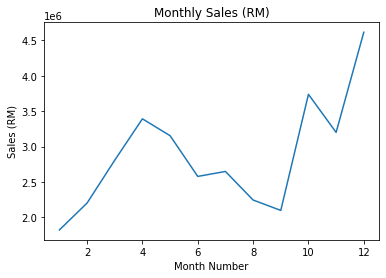

In [39]:
months = sales_groupby_month.index
sales = sales_groupby_month[: ]

fig, ax = plt.subplots(1, 1)
ax.plot(months, sales)
ax.set_xlabel('Month Number')
ax.set_ylabel('Sales (RM)')
ax.set_title('Monthly Sales (RM)')
#ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Which city had the highest sales?

In [40]:
df

,id,product,quantity,price,date,address,sales,month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1
...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12


## get city name from the address column

In [51]:
# ## Keith's method
# # define two function to get the city name and the state
# #city
# def get_city(address):
#     return address.split(', ')[1]

# def get_state(address):
#     return address.split(', ')[2].split()[0]

# df['city'] = df['address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

# df

# extract city name from the address
# split the string at the ', ' occurrences. this give a list with 3 elements in it
# use .apply() and lambda function that is applied to each list in each row.
# taking the 2nd element in the list which is the city name
df['city'] = df['address'].str.split(', ').apply(lambda x: x[1])
df

,id,product,quantity,price,date,address,sales,month,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,Seattle
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,Dallas


In [58]:
# groupby city and get aggregation e.g. sum
sales_groupby_city = df.groupby('city').sum()
sales_groupby_city.sort_values('sales', ascending = False)

,quantity,price,sales,month
city,,,,
San Francisco,50239.0,8211461.74,8262203.91,315520
Los Angeles,33289.0,5421435.23,5452570.80,208325
New York City,27932.0,4635370.83,4664317.43,175741
Boston,22528.0,3637409.77,3661642.01,141112
Atlanta,16602.0,2779908.20,2795498.58,104794
Dallas,16730.0,2752627.82,2767975.40,104620
Seattle,16553.0,2733296.01,2747755.48,104941
Portland,14053.0,2307747.47,2320490.61,87765
Austin,11153.0,1809873.61,1819581.75,69829


In [70]:
sales_groupby_city_reset_index = sales_groupby_city.reset_index()
sales_groupby_city_reset_index

,city,quantity,price,sales,month
0,Atlanta,16602.0,2779908.20,2795498.58,104794
1,Austin,11153.0,1809873.61,1819581.75,69829
2,Boston,22528.0,3637409.77,3661642.01,141112
3,Dallas,16730.0,2752627.82,2767975.40,104620
4,Los Angeles,33289.0,5421435.23,5452570.80,208325
5,New York City,27932.0,4635370.83,4664317.43,175741
6,Portland,14053.0,2307747.47,2320490.61,87765
7,San Francisco,50239.0,8211461.74,8262203.91,315520
8,Seattle,16553.0,2733296.01,2747755.48,104941


## So, the city with highest sales is San Francisco (RM 8,262,203.91)

## plotting bar chart

<AxesSubplot:ylabel='city'>

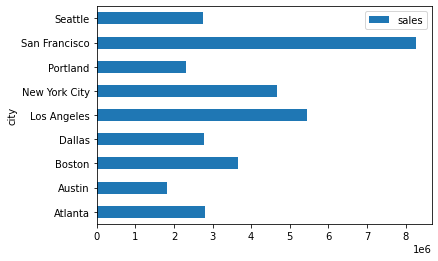

In [74]:
sales_groupby_city_reset_index.plot(kind = 'barh', y = 'sales', x = 'city')

# what time of the day to display ads to maximize likelihood of customers buying the product?

In [75]:
df

,id,product,quantity,price,date,address,sales,month,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,1,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,1,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,1,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,1,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,1,Austin
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",14.95,12,San Francisco
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.68,12,Los Angeles
25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",400.00,12,Seattle
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",11.99,12,Dallas


In [88]:
# extract time from the date columns
time_list = [datetime.datetime.time(d) for d in df['date']]
time_list

[datetime.time(21, 25),
 datetime.time(14, 15),
 datetime.time(13, 33),
 datetime.time(20, 33),
 datetime.time(11, 59),
 datetime.time(20, 22),
 datetime.time(12, 16),
 datetime.time(12, 4),
 datetime.time(10, 30),
 datetime.time(21, 20),
 datetime.time(11, 29),
 datetime.time(10, 12),
 datetime.time(18, 57),
 datetime.time(19, 19),
 datetime.time(21, 54),
 datetime.time(17, 20),
 datetime.time(11, 20),
 datetime.time(8, 13),
 datetime.time(9, 28),
 datetime.time(0, 9),
 datetime.time(11, 51),
 datetime.time(20, 55),
 datetime.time(10, 40),
 datetime.time(18, 51),
 datetime.time(21, 47),
 datetime.time(17, 26),
 datetime.time(22, 0),
 datetime.time(18, 14),
 datetime.time(12, 35),
 datetime.time(23, 33),
 datetime.time(9, 46),
 datetime.time(16, 52),
 datetime.time(22, 21),
 datetime.time(8, 28),
 datetime.time(10, 13),
 datetime.time(20, 5),
 datetime.time(23, 10),
 datetime.time(10, 51),
 datetime.time(13, 9),
 datetime.time(12, 4),
 datetime.time(11, 30),
 datetime.time(16, 6),
 dat

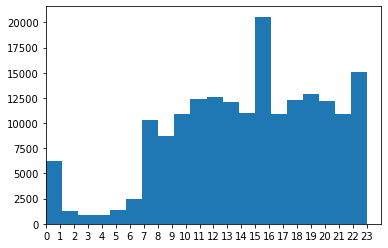

In [95]:
#define function for plotting the sales hours distribution
def chart(occurance_list):
    hour_list = [t.hour for t in occurance_list]
    numbers = [x for x in np.arange(0, 24)]
    labels = map(lambda x: str(x), numbers)

    fig, ax = plt.subplots(1, 1)
    ax.hist(hour_list, bins = 20)
    ax.set_xlim(0, 24)
    ax.set_xticks(numbers, labels)
    plt.show()

#call for plotting
chart(time_list)

* We can roughly see how most of the sales are obtained in daylight. 
* Sales increasing from early morning and peaks between 3pm and 4pm.
* Then, it gradually decrease as we go later in the day